In [1]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import yfinance as yf
# Define the stock ticker symbol
ticker = "NVDA"  # Replace with the stock symbol you want, e.g., 'GOOG', 'TSLA'

# Fetch the historical data
msft_data = yf.download("MSFT", start="2024-09-01", end="2024-11-29", interval="1d")

# Display the data
print(msft_data)


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2024-09-03  408.622070  409.440002  419.880005  407.029999  417.910004   
2024-09-04  408.083160  408.899994  411.239990  404.369995  405.910004   
2024-09-05  407.574188  408.390015  413.100006  406.130005  407.619995   
2024-09-06  400.897552  401.700012  410.649994  400.799988  409.059998   
2024-09-09  404.909515  405.720001  408.649994  402.149994  407.239990   
...                ...         ...         ...         ...         ...   
2024-11-21  412.869995  412.869995  419.779999  410.290009  419.500000   
2024-11-22  417.000000  417.000000  417.399994  411.059998  411.369995   
2024-11-25  418.790009  418.790009  421.079987  414.850006  418.380005   
2024-11-26  427.989990  427.989990  429.040009  418.850006  419.589996   
2024-11-27  422.989990  422.989990  42

In [8]:
# Saving the data into CSV Formate 

msft_data = pd.read_csv('MSFT_Data_Set.csv')

In [9]:

msft_data= msft_data.drop([0, 1]).reset_index(drop=True)

In [10]:
## Changing the column name from price to Date

msft_data = msft_data.rename(columns={'Price': 'Date'})

In [11]:
# Dropping Adjusted Close as they have very high correlation with close price

msft_data = msft_data.drop('Adj Close', axis=1)

In [12]:
## Converting the date column into correct data type (Datetime)

msft_data['Date'] = pd.to_datetime(msft_data['Date'], errors='coerce')


In [13]:
msft_data.set_index('Date', inplace=True)

In [14]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2014-01-02 to 2024-11-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2743 non-null   object
 1   High    2743 non-null   object
 2   Low     2743 non-null   object
 3   Open    2743 non-null   object
 4   Volume  2743 non-null   object
dtypes: object(5)
memory usage: 128.6+ KB


Text(0, 0.5, 'Total sales')

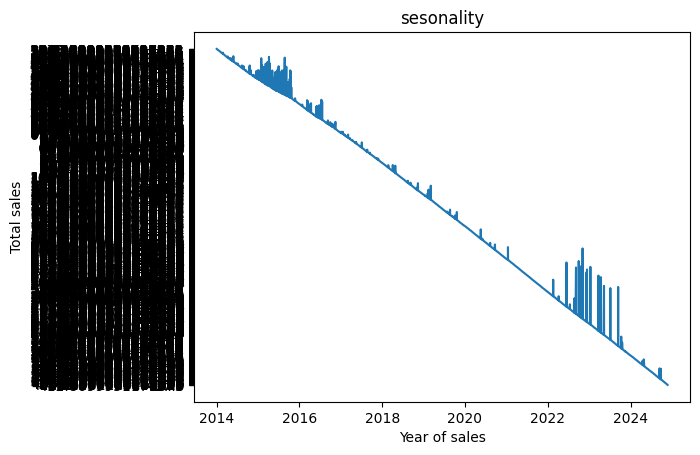

In [15]:
sns.lineplot(msft_data['Close'])
plt.title("sesonality")
plt.xlabel('Year of sales')
plt.ylabel('Total sales')

In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(msft_data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Interpret the p-value
if result[1] <= 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is not stationary (fail to reject null hypothesis).")


ADF Statistic: 0.8104050749792536
p-value: 0.9918022823581515
Critical Values: {'1%': np.float64(-3.432759974661461), '5%': np.float64(-2.862604751229049), '10%': np.float64(-2.5673368020035094)}
The data is not stationary (fail to reject null hypothesis).


In [17]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2014-01-02 to 2024-11-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2743 non-null   object
 1   High    2743 non-null   object
 2   Low     2743 non-null   object
 3   Open    2743 non-null   object
 4   Volume  2743 non-null   object
dtypes: object(5)
memory usage: 128.6+ KB


In [18]:
numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    msft_data[col] = pd.to_numeric(msft_data[col], errors='coerce')


In [19]:
## Converting the data to stationary data 


msft_data['Differenced'] = msft_data['Close'].diff().dropna()


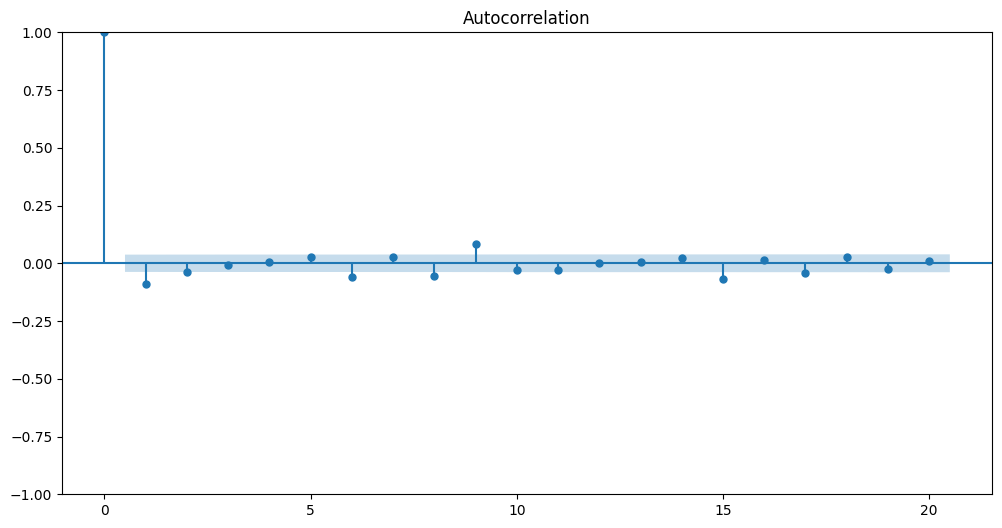

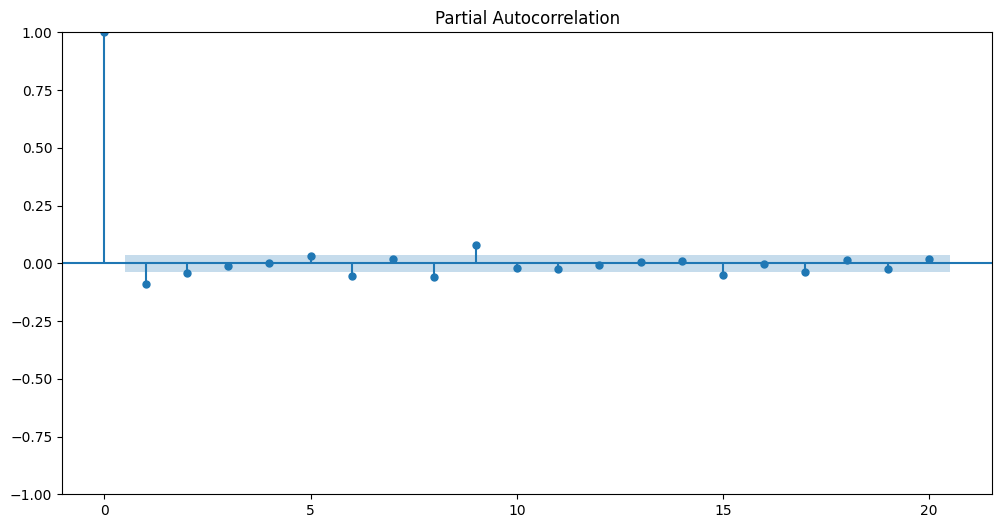

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(12, 6))
plot_acf(msft_data['Differenced'].dropna(), lags=20, ax=plt.gca())
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(msft_data['Differenced'].dropna(), lags=20, ax=plt.gca())
plt.show()


In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
p, d, q = 2, 1, 2  # Replace with identified parameters
model = ARIMA(msft_data['Close'], order=(p, d, q))

# Fit the model
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2743
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7241.187
Date:                Sat, 30 Nov 2024   AIC                          14492.374
Time:                        09:31:47   BIC                          14521.956
Sample:                             0   HQIC                         14503.064
                               - 2743                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4701      0.136      3.455      0.001       0.203       0.737
ar.L2         -0.6079      0.085     -7.118      0.000      -0.775      -0.441
ma.L1         -0.5422      0.137     -3.969      0.0

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


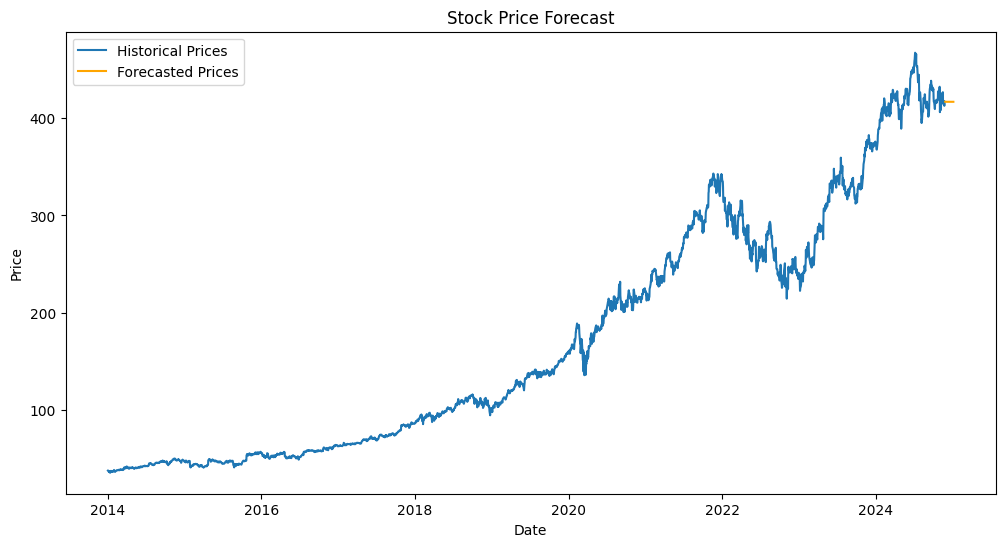

In [22]:
# Forecast future values
forecast_steps = 30  # Number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Close'], label='Historical Prices')
plt.plot(pd.date_range(msft_data.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecasted Prices', color='orange')
plt.title("Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get the in-sample predictions
in_sample_preds = fitted_model.predict(start=1, end=len(msft_data['Close']) - 1)

# Calculate evaluation metrics
mae = mean_absolute_error(msft_data['Close'][1:], in_sample_preds)
mse = mean_squared_error(msft_data['Close'][1:], in_sample_preds)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 2.0579108192956994
Mean Squared Error (MSE): 11.516697689454197


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\st

Best ARIMA Order: (1, 1, 1)
Best AIC: 384.54154274801783


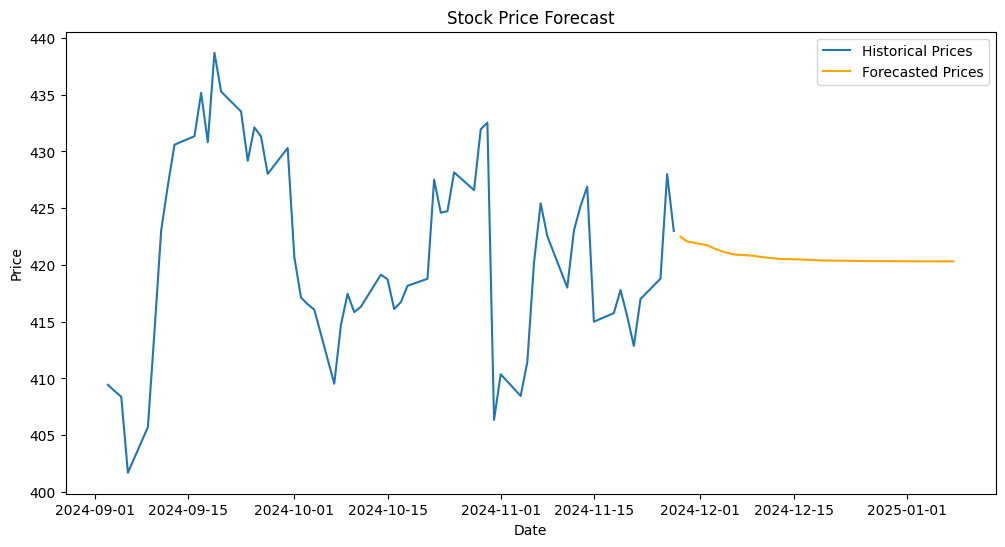

Mean Absolute Error (MAE): 5.699849576042017
Mean Squared Error (MSE): 44.191870636964495
Root Mean Squared Error (RMSE): 6.647696641466463


In [4]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA

# Define a function to perform grid search for hyperparameter tuning
def grid_search_arima(msft_data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None
    best_model = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model
                    model = ARIMA(msft_data['Close'], order=(p, d, q))
                    model_fit = model.fit()
                    
                    # Store the model if it has the lowest AIC
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    # Skip combinations that cause errors
                    continue
    
    return best_model, best_order, best_aic

# Define ranges for hyperparameters
p_values = range(0, 6)  # Autoregressive order
d_values = range(0, 3)  # Differencing order
q_values = range(0, 6)  # Moving Average order

# Perform grid search to find the best ARIMA model
best_model, best_order, best_aic = grid_search_arima(msft_data, p_values, d_values, q_values)

# Print the best model parameters
print(f"Best ARIMA Order: {best_order}")
print(f"Best AIC: {best_aic}")

# Forecasting using the best model
forecast_steps = 30
forecast = best_model.forecast(steps=forecast_steps)

# Visualizing the forecast
plt.figure(figsize=(12, 6))
plt.plot(msft_data['Close'], label='Historical Prices')
plt.plot(pd.date_range(msft_data.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecasted Prices', color='orange')
plt.title("Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Calculate forecast error
forecast_dates = pd.date_range(msft_data.index[-1], periods=forecast_steps+1, freq='B')[1:]
y_true = msft_data['Close'].iloc[-forecast_steps:]  # True values for comparison

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, forecast)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_true, forecast)
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

[*********************100%***********************]  1 of 1 completed


Fetched 43 days of data for AAPL


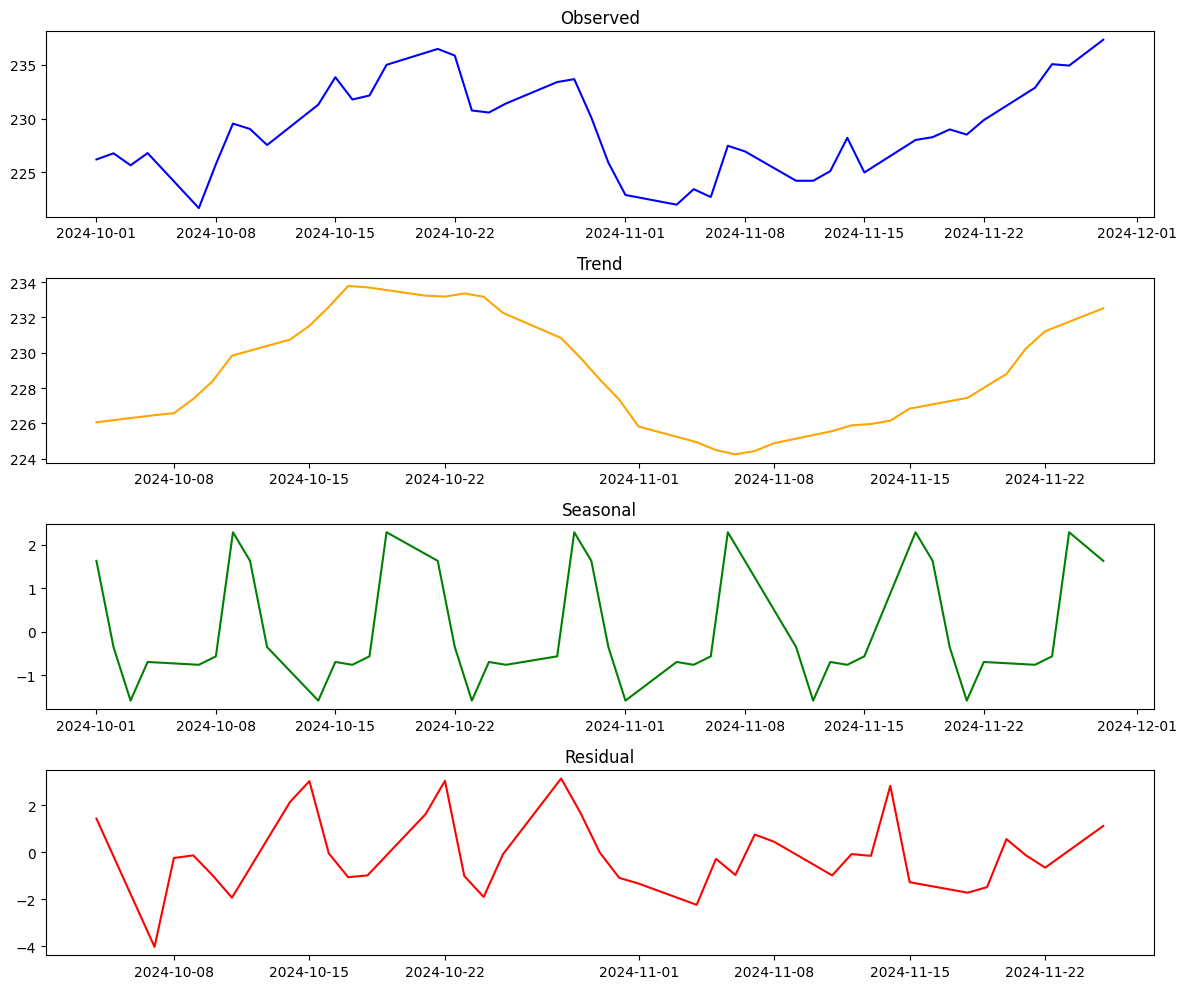

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Pred

Best model summary:
                                      SARIMAX Results                                      
Dep. Variable:                                AAPL   No. Observations:                   43
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 30)   Log Likelihood                 -29.702
Date:                             Sat, 30 Nov 2024   AIC                             65.405
Time:                                     13:48:44   BIC                             66.859
Sample:                                          0   HQIC                            64.866
                                              - 43                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0320      0.748     -0.043      0.966      -1.498       1.434
ma.L1  

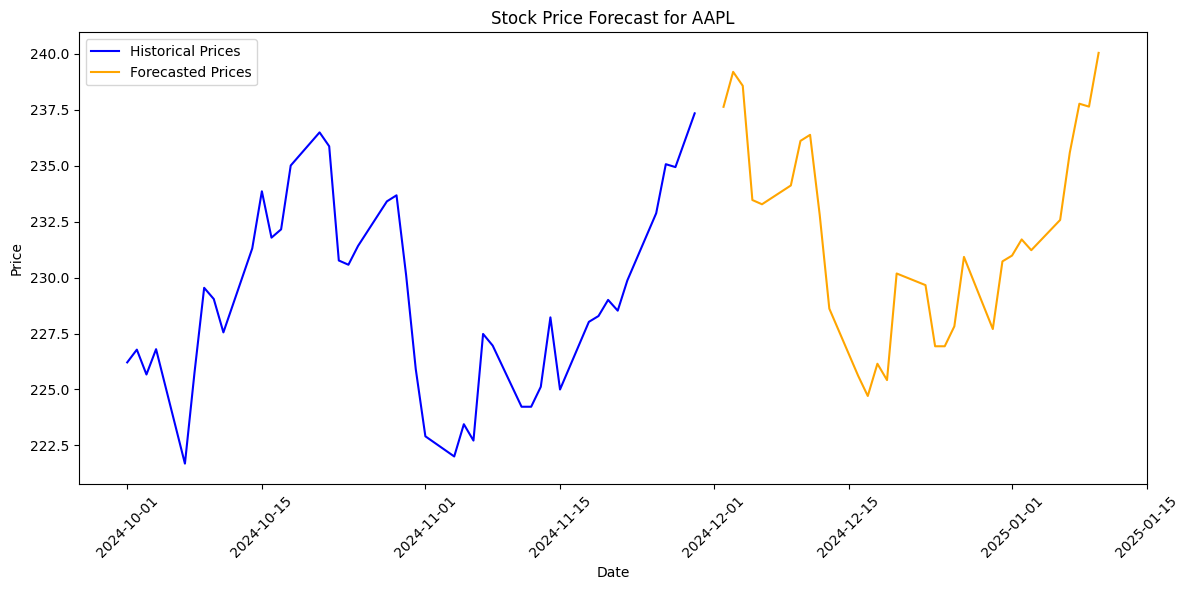

In [3]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Fetch stock data for the past two months
def fetch_stock_data(ticker):
    end_date = datetime.today().date()
    start_date = end_date - timedelta(days=60)  # Past 2 months
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    
    # Check if data is empty
    if data.empty:
        raise ValueError(f"No data found for ticker {ticker} in the last 2 months.")
    
    return data.dropna()

# Function to visualize seasonal decomposition
def visualize_seasonality(data):
    # Perform seasonal decomposition
    result = seasonal_decompose(data['Close'], model='additive', period=7)  # Weekly seasonality

    # Plot the decomposition components
    plt.figure(figsize=(12, 10))
    plt.subplot(411)
    plt.plot(result.observed, label='Observed', color='blue')
    plt.title("Observed")
    plt.subplot(412)
    plt.plot(result.trend, label='Trend', color='orange')
    plt.title("Trend")
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.title("Seasonal")
    plt.subplot(414)
    plt.plot(result.resid, label='Residual', color='red')
    plt.title("Residual")
    plt.tight_layout()
    plt.show()

# Dynamic model selection with ARIMA and SARIMA
def select_and_forecast(data, forecast_days):
    best_model = None
    best_aic = float("inf")
    best_bic = float("inf")
    best_forecast = None
    
    # Try ARIMA models
    for p in range(1, 3):  # Adjust range as needed
        for d in range(0, 2):
            for q in range(1, 3):
                try:
                    model = ARIMA(data['Close'], order=(p, d, q))
                    fitted_model = model.fit()
                    aic, bic = fitted_model.aic, fitted_model.bic
                    if aic < best_aic or bic < best_bic:
                        best_aic, best_bic = aic, bic
                        best_model = fitted_model
                        best_forecast = fitted_model.forecast(steps=forecast_days)
                except:
                    continue
    
    # Try SARIMA models
    for p in range(1, 3):  # Adjust range as needed
        for d in range(0, 2):
            for q in range(1, 3):
                for P in range(0, 2):
                    for D in range(0, 2):
                        for Q in range(0, 2):
                            for s in [7, 30]:  # Weekly or monthly seasonality
                                try:
                                    model = SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
                                    fitted_model = model.fit(disp=False)
                                    aic, bic = fitted_model.aic, fitted_model.bic
                                    if aic < best_aic or bic < best_bic:
                                        best_aic, best_bic = aic, bic
                                        best_model = fitted_model
                                        best_forecast = fitted_model.forecast(steps=forecast_days)
                                except:
                                    continue
    
    return best_model, best_forecast

# Main function
def main():
    ticker = "AAPL"  # Replace with your desired stock ticker
    forecast_days = 30  # Number of days to forecast
    
    try:
        # Fetch and process stock data
        data = fetch_stock_data(ticker)
        print(f"Fetched {len(data)} days of data for {ticker}")
        
        # Visualize seasonality
        visualize_seasonality(data)
        
        # Select and forecast using the best model
        best_model, forecast = select_and_forecast(data, forecast_days)
        if best_model is not None:
            print(f"Best model summary:\n{best_model.summary()}")
        else:
            print("No suitable model found.")
        
        # Prepare forecasted data
        forecast_dates = pd.date_range(data.index[-1], periods=forecast_days + 1, freq='B')[1:]
        forecast_df = pd.DataFrame({
            'Date': forecast_dates,
            'Forecasted Price': forecast
        })
        
        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(data['Close'], label='Historical Prices', color='blue')
        plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Prices', color='orange')
        plt.title(f"Stock Price Forecast for {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Run the main function
if __name__ == "__main__":
    main()


In [1]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import streamlit as st
import matplotlib.pyplot as plt

# Streamlit setup
st.title("Stock Price Analysis Dashboard")
st.sidebar.header("Settings")

# Stock tickers available
tickers = ["AAPL", "MSFT", "TSLA", "TATAMOTORS.NS", "RELIANCE.NS", "NVDA", "SUZLON.NS"]
selected_tickers = st.sidebar.multiselect("Select Stock Ticker(s)", tickers, default=["AAPL", "MSFT"])

forecast_days = st.sidebar.slider("Select the number of forecast days", min_value=5, max_value=90, value=30)

# Fetch stock data for the past two months
def fetch_stock_data(ticker):
    end_date = datetime.today().date()
    start_date = end_date - timedelta(days=60)  # Past 2 months
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    
    if data.empty:
        raise ValueError(f"No data found for ticker {ticker} in the last 2 months.")
    
    return data.dropna()

# Visualize historical data
def visualize_historical_data(data, ticker):
    st.subheader(f"Historical Stock Prices for {ticker}")
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(data.index, data['Close'], label="Closing Price", color="blue")
    ax.set_title(f"Historical Closing Prices for {ticker}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    plt.grid()
    st.pyplot(fig)

# Visualize seasonal decomposition
def visualize_seasonality(data, ticker):
    result = seasonal_decompose(data['Close'], model='additive', period=7)  # Weekly seasonality
    
    st.subheader(f"Seasonal Decomposition for {ticker}")
    fig, axs = plt.subplots(4, 1, figsize=(12, 10))
    axs[0].plot(result.observed, label='Observed', color='blue')
    axs[0].set_title("Observed")
    axs[1].plot(result.trend, label='Trend', color='orange')
    axs[1].set_title("Trend")
    axs[2].plot(result.seasonal, label='Seasonal', color='green')
    axs[2].set_title("Seasonal")
    axs[3].plot(result.resid, label='Residual', color='red')
    axs[3].set_title("Residual")
    plt.tight_layout()
    st.pyplot(fig)

# Select and forecast using ARIMA
def select_and_forecast(data, forecast_days):
    best_model = None
    best_aic = float("inf")
    best_forecast = None
    
    for p in range(1, 3):  # Adjust range as needed
        for d in range(0, 2):
            for q in range(1, 3):
                try:
                    model = ARIMA(data['Close'], order=(p, d, q))
                    fitted_model = model.fit()
                    aic = fitted_model.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_model = fitted_model
                        best_forecast = fitted_model.forecast(steps=forecast_days)
                except:
                    continue
    
    return best_model, best_forecast

# Main function to process each stock
def process_ticker(ticker, forecast_days):
    try:
        # Fetch and process stock data
        data = fetch_stock_data(ticker)
        st.subheader(f"Stock Data for {ticker}")
        st.write(data.tail())
        
        # Visualize historical data
        visualize_historical_data(data, ticker)
        
        # Visualize seasonality
        visualize_seasonality(data, ticker)
        
        # Forecast
        best_model, forecast = select_and_forecast(data, forecast_days)
        if best_model:
            st.subheader(f"Forecasted Prices for {ticker}")
            forecast_dates = pd.date_range(data.index[-1], periods=forecast_days + 1, freq='B')[1:]
            forecast_df = pd.DataFrame({
                'Date': forecast_dates,
                'Forecasted Price': forecast
            })
            st.write(forecast_df)
            
            # Plot forecast
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(data['Close'], label='Historical Prices', color='blue')
            ax.plot(forecast_dates, forecast, label='Forecasted Prices', color='orange')
            ax.set_title(f"Stock Price Forecast for {ticker}")
            ax.set_xlabel("Date")
            ax.set_ylabel("Price")
            ax.legend()
            st.pyplot(fig)
        else:
            st.error(f"No suitable model found for {ticker}.")
    except ValueError as e:
        st.error(e)
    except Exception as e:
        st.error(f"An unexpected error occurred for {ticker}: {e}")

# Streamlit app
if selected_tickers:
    for ticker in selected_tickers:
        process_ticker(ticker, forecast_days)
else:
    st.info("Please select at least one stock ticker to analyze.")


2024-11-30 16:30:19.141 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 16:30:20.149 
  command:

    streamlit run C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-30 16:30:20.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 16:30:20.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 16:30:20.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 16:30:20.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 16:30:20.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-30 16:30:20.155 Thread 